1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

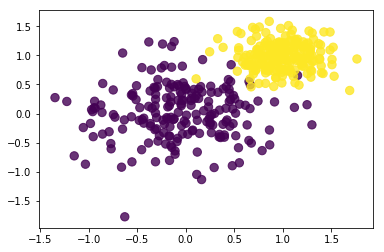

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [18]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as pltimport


(array([  4,  30,  54, 142, 210, 266, 178,  77,  29,  10], dtype=int64), array([-0.53089961, -0.46662766, -0.40235571, -0.33808376, -0.27381182,
       -0.20953987, -0.14526792, -0.08099597, -0.01672402,  0.04754793,
        0.11181987]))
[-0.53089961 -0.46662766 -0.40235571 -0.33808376 -0.27381182 -0.20953987
 -0.14526792 -0.08099597 -0.01672402  0.04754793]
[  4  30  54 142 210 266 178  77  29  10]


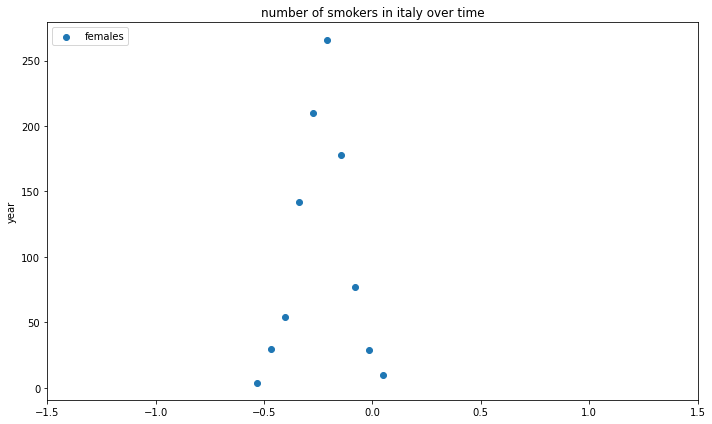

In [19]:
x=np.linspace(-1.5,1.5,1000)
a, b = -1.5, 1.5
mu, sigma = -0.2, 0.1
dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)

vals = dist.rvs(1000)
y,x= np.histogram(a=vals)
print(np.histogram(a=vals))
print(x[0:10])
print(y)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=x[0:10],y=y, label='females')
# ax.scatter(x=yrs, y=y[0,:]+5, label='males')

ax.set_title('number of smokers in italy over time')
ax.legend(loc='upper left')
ax.set_ylabel('numbers in thousands')
ax.set_ylabel('year')
ax.set_xlim(-1.5,1.5)
fig.tight_layout()

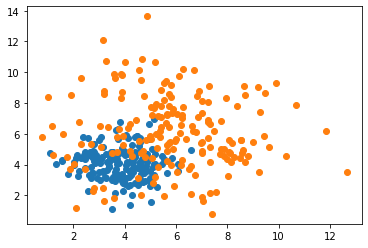

In [20]:
means = [4, 6]
stds  = [1.0, 2.2]
n=180
for i in range(len(means)):
    x = np.random.normal(means[i], stds[i], n)
    y = np.random.normal(means[i], stds[i], n)
    plt.scatter(x,y)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [21]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2021-11-30 21:46:18--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-11-30 21:46:19--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc849ca1593d2da530be478d9f84.dl.dropboxusercontent.com/cd/0/inline/Ba8gJ2hW6KckrsbmsKGkWQMrmGRmsab3Hbiuf5Vl3wKxi74uZJO9pRrJRyQm7KU03xs2_chC2EwxCCMRzH3ABIlpJMjGL652d5ibpbB0_8Nq5BRNwustEmuOgkeSB9MtzfbPzLr4FHB8EPuFtpjugWKo/file# [following]
--2021-11-30 21:46:20--  https://uc849ca1593d2da530be478d9f84.dl.dropboxusercontent.com/cd/0/inline/Ba8gJ2hW6KckrsbmsKGkWQMrmGRmsab3Hbiuf5Vl3wKxi74uZJO9pRrJRyQm7KU03xs2_chC2EwxCCMRzH3ABIlpJMjGL652d5ibp

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


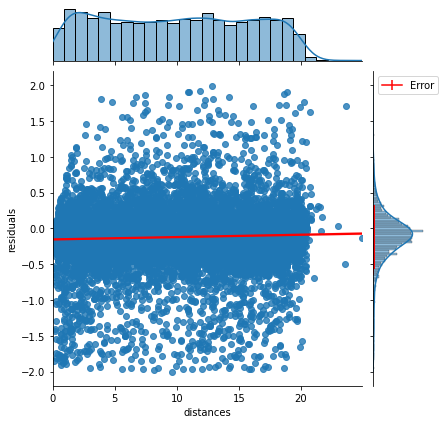

In [22]:
data = np.load('data/residuals_261.pkl.1',allow_pickle=True).item()
ds = pd.DataFrame(data)
ds = ds[ abs(ds['residuals'])<2 ]

lr = stats.linregress(ds['distances'], ds['residuals'])
sns.jointplot(ds['distances'], ds['residuals'], kind='reg',
             line_kws={'color':'red', 'label':'Lin.reg.'})

step = 15
x = np.linspace(0,20,step)
y = np.zeros(x.size)
arry = np.zeros(x.size)

c = 0
_e = x[0]
for e in x[1:]:
    b = ds[ ds['distances']>=_e ]
    b =  b[  b['distances']<e ]
    bVal = b['residuals']
    
    y[c] = bVal.mean()
    arry[c] = bVal.std()
    prevEl = e
    c += 1

plt.errorbar(x, y, yerr=arry, color='red', label='Error')
plt.legend();

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


<ipython-input-23-3d133e74b479>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


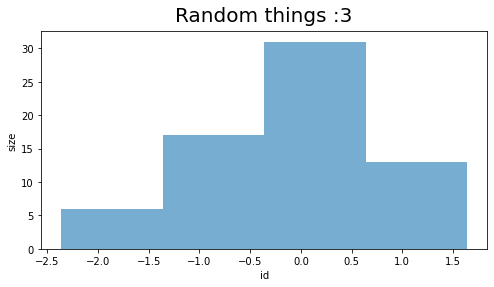

In [23]:
N = 70
x = np.random.normal(0,1, N)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
freq, bins,_  = ax.hist(x, bins=np.arange(x.min(), x.max()), alpha=0.6)
ax.set_title("Random things :3", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("id")
ax.set_ylabel("size")
fig.show()

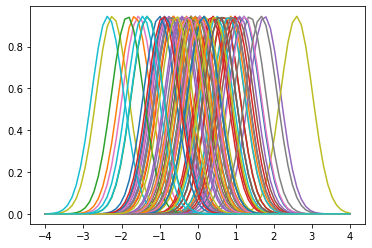

Normalized integral: 69.99943851735146
Histogram: 67.0


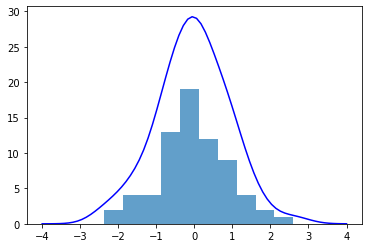

In [25]:
norms = []
for i in x:
    d = np.linspace(-4, 4, N)
    g = stats.norm.pdf(d, i, 1.06*x.std()*x.size**(-(1/5)))
    norms.append(g)
    plt.plot(d, g, '-')
plt.show()

norms = np.array(norms)
s = np.sum(norms, axis=0)
step_size = bins[1] - bins[0]

print("Normalized integral:", integrate.trapz(s*step_size, d))
print("Histogram:", np.sum(step_size*freq))
plt.hist(x, alpha = 0.7);
plt.plot(d, s*step_size, '-b');